# Read data

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [246]:
df = pd.read_csv('train.csv')
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [247]:
used_cols = []

In [248]:
df_test = pd.read_csv('test.csv')
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


# Helper functions

In [249]:
def plot_residuals(y_pred, y_test):
    residuals = y_pred - y_test
    
    sns.scatterplot(x=y_test.flatten(), y=residuals.flatten(), alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Actual House Prices")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.show()     
    
def get_X_test(df, used_cols):
    X = df[used_cols].values
    return X

def create_submission(df_test, y_pred):
    submission_df = pd.DataFrame({'Id': df_test['Id'].values, 'SalePrice': y_pred})
    df.to_csv('submission.csv',index=False)
    return submission_df

def filter_outliers(df):
    df = df.query("`LotArea` < 100000")
    return df

# Split

In [250]:
df_train, df_val = train_test_split(df, test_size=0.2, random_state=42)

print(f"df_train shape: {df_train.shape}")
print(f"df_val shape: {df_val.shape}")

df_train shape: (1168, 81)
df_val shape: (292, 81)


# Exploratory Data Analysis

## Lot Area

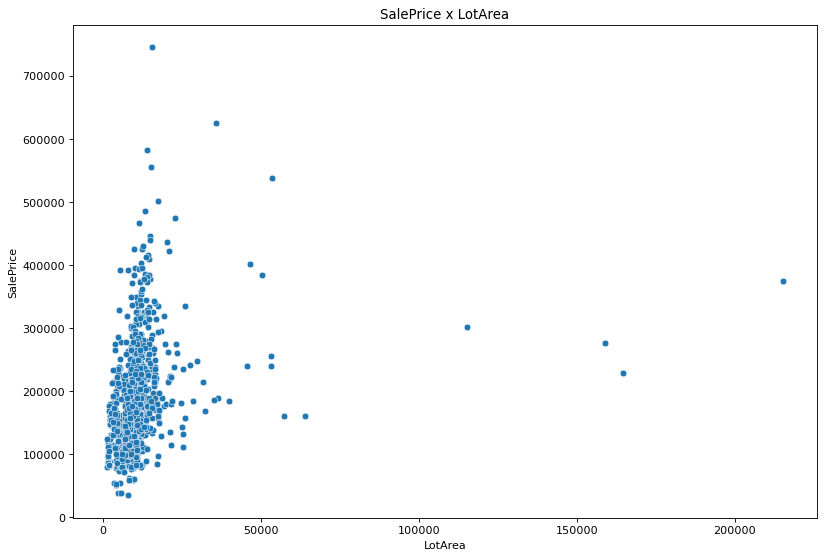

In [251]:
# Scatter plot of Lot Area
if 'LotArea' not in used_cols:
    used_cols.append('LotArea')

plt.figure(figsize=(12, 8), dpi=80)
plt.title('SalePrice x LotArea')
sns.scatterplot(data=df_train, x="LotArea", y="SalePrice")

plt.show()

In [252]:
print(f"Correlation between LotArea and SalePrice is: {np.corrcoef(df_train['LotArea'], df_train['SalePrice'])[0][1]:.2f}")

Correlation between LotArea and SalePrice is: 0.27


# Outliers

In [253]:
df_train = filter_outliers(df_train)
print(f"Correlation between LotArea and SalePrice is: {np.corrcoef(df_train['LotArea'], df_train['SalePrice'])[0][1]:.2f}")

Correlation between LotArea and SalePrice is: 0.37


# Train

In [254]:
X_train = df_train[used_cols].values
y_train = df_train["SalePrice"].values


X_val = df_val[used_cols].values
y_val = df_val["SalePrice"].values

In [255]:
lr = LinearRegression().fit(X_train, y_train)

# Test

In [256]:
y_pred_val = lr.predict(X_val)

In [257]:
rms = sqrt(mean_squared_error(y_val, y_pred_val))
print(f"RMSE is {rms:.2f}")

RMSE is 83336.46


In [258]:
# Residuals plot

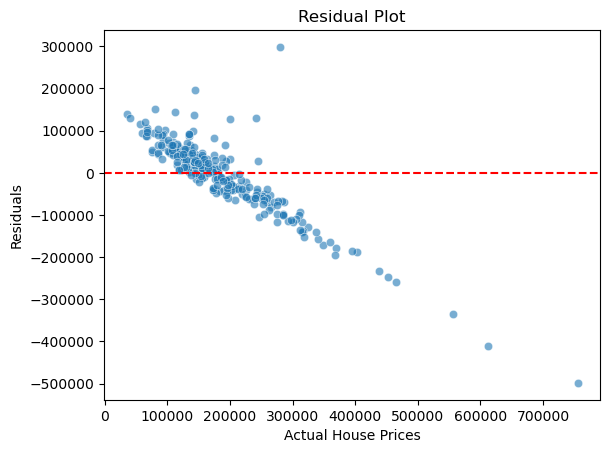

In [259]:
plot_residuals(y_pred, y_val)

In [260]:
X_test = get_X_test(df_test, used_cols)
y_pred_test = lr.predict(X_test)

# Submission

In [262]:
df = create_submission(df_test, y_pred_test)
df.head(10)

,Id,SalePrice
0,1461,188446.731966
1,1462,201871.951319
2,1463,199653.871600
3,1464,180102.285608
4,1465,154860.842944
5,1466,180213.950948
6,1467,169961.042406
7,1468,172102.986666
8,1469,181107.273673
9,1470,172092.835271


# Key points

- Created the first version for the notebook
- Used a Linear Regression for baseline
- Added 1 feature for prediction (LotArea)
- Removed outliers with LotArea > 100.000
- RMSE score of 83336.46
- Submission score of [inserir]